### 1. Importar librerías:

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

### 2. Abrir archivos:

In [122]:
df_fhvhv_tripdata = pd.read_parquet('../Datasets/TLC_NYC/4. fhvhv_tripdata_2023-12.parquet')
df_fhvhv_tripdata

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2023-11-30 23:58:32,2023-12-01 00:02:29,2023-12-01 00:03:42,2023-12-01 00:26:21,13,143,4.840,...,3.86,2.75,0.0,3.00,29.55,N,N,N,N,N
1,HV0003,B03404,B03404,2023-12-01 00:37:55,2023-12-01 00:43:29,2023-12-01 00:44:37,2023-12-01 00:54:01,163,238,2.030,...,2.03,2.75,0.0,0.00,15.42,N,N,N,N,N
2,HV0003,B03404,B03404,2023-11-30 23:56:12,2023-12-01 00:12:07,2023-12-01 00:12:26,2023-12-01 00:54:03,246,244,7.860,...,2.64,2.75,0.0,7.19,36.30,N,N,N,N,N
3,HV0003,B03404,B03404,2023-12-01 00:05:59,2023-12-01 00:09:35,2023-12-01 00:10:30,2023-12-01 00:39:52,231,245,14.350,...,5.00,2.75,0.0,0.00,35.42,N,N,N,N,N
4,HV0003,B03404,B03404,2023-12-01 00:16:09,2023-12-01 00:21:38,2023-12-01 00:22:08,2023-12-01 01:02:56,231,265,26.090,...,8.10,2.75,0.0,0.00,60.85,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20516292,HV0005,B03406,None,2023-12-31 23:35:57,NaT,2023-12-31 23:39:27,2023-12-31 23:48:05,17,49,1.581,...,0.94,0.00,0.0,0.00,7.00,N,N,N,N,N
20516293,HV0003,B03404,B03404,2023-12-31 23:18:14,2023-12-31 23:19:16,2023-12-31 23:21:17,2023-12-31 23:50:30,186,160,8.740,...,3.30,2.75,0.0,0.00,27.96,N,N,N,N,N
20516294,HV0003,B03404,B03404,2023-12-31 23:18:22,2023-12-31 23:21:40,2023-12-31 23:22:26,2023-12-31 23:26:17,228,228,0.530,...,0.79,0.00,0.0,0.00,5.74,N,N,N,N,N
20516295,HV0003,B03404,B03404,2023-12-31 22:58:13,2023-12-31 23:01:28,2023-12-31 23:03:17,2023-12-31 23:30:34,119,50,10.140,...,2.16,2.75,0.0,0.00,30.99,N,N,N,N,N


Contar total de registros:

In [123]:
Total_Registros_inicial= len(df_fhvhv_tripdata)
Total_Registros_inicial

20516297

In [124]:
df_fhvhv_tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20516297 entries, 0 to 20516296
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[us]
 4   on_scene_datetime     datetime64[us]
 5   pickup_datetime       datetime64[us]
 6   dropoff_datetime      datetime64[us]
 7   PULocationID          int32         
 8   DOLocationID          int32         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

### 3. Verificar participación de Uber:

In [125]:
resumen_conteo = df_fhvhv_tripdata['hvfhs_license_num'].value_counts()
print(resumen_conteo)

hvfhs_license_num
HV0003    14273626
HV0005     6242671
Name: count, dtype: int64


Solo se muestran dos empresas de servicio, Uber representa el 70% de la demanda atendida. Para el proyecto usaremos sin discriminar los datos de Uber/Lyft.

### 4. Eliminar columnas innecesarias:

In [126]:
df_fhvhv_tripdata.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

In [127]:
columnas_eliminar = ['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'on_scene_datetime','trip_time', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag','tips']

UberLyft = df_fhvhv_tripdata.drop(columns=columnas_eliminar)

In [128]:
UberLyft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20516297 entries, 0 to 20516296
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   request_datetime      datetime64[us]
 1   pickup_datetime       datetime64[us]
 2   dropoff_datetime      datetime64[us]
 3   PULocationID          int32         
 4   DOLocationID          int32         
 5   trip_miles            float64       
 6   base_passenger_fare   float64       
 7   tolls                 float64       
 8   bcf                   float64       
 9   sales_tax             float64       
 10  congestion_surcharge  float64       
 11  airport_fee           float64       
dtypes: datetime64[us](3), float64(7), int32(2)
memory usage: 1.7 GB


Diminución considerable de los datos a 1.8GB

### 5. Revisar Outliers e imputaciones:

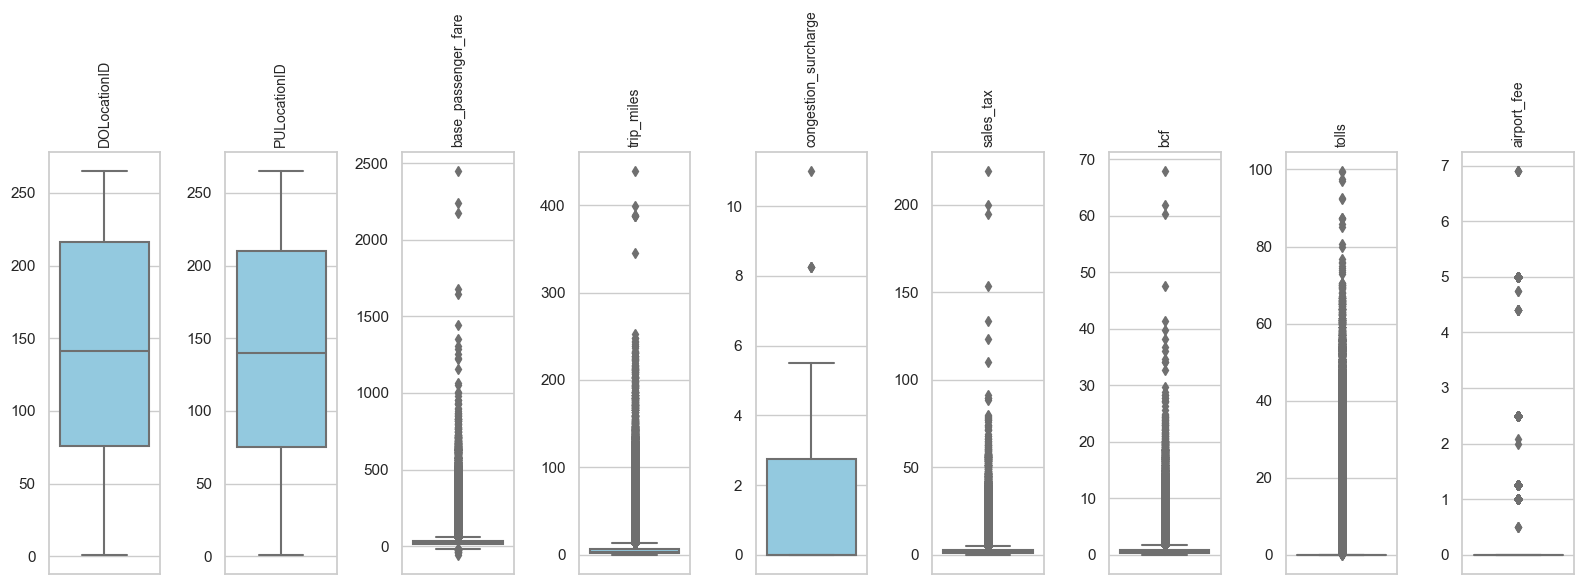

In [129]:
# Selecciona solo las columnas numéricas
df_numerical = UberLyft.select_dtypes(include='number')

# Calcula el IQR (rango intercuartílico) para cada columna y ordénalas por el IQR
iqr_values = (df_numerical.quantile(0.75) - df_numerical.quantile(0.25)).sort_values(ascending=False)
sorted_columns = iqr_values.index

# Ordena las columnas en df_numerical de acuerdo con el orden de iqr_values
df_numerical = df_numerical[sorted_columns]


# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Tamaño de la figura y espaciado entre subtramas
plt.figure(figsize=(16, 6))
plt.subplots_adjust(wspace=0.4)  # Ajusta el espaciado horizontal entre subtramas

# Crea el gráfico de caja utilizando Seaborn
for i, column in enumerate(sorted_columns):
    ax = plt.subplot(1, len(sorted_columns), i+1)  # Subtrama para cada variable
    sns.boxplot(y=df_numerical[column], color='skyblue', ax=ax)
    ax.set_title(column, rotation=90, fontsize=10)  # Rotar el título y ajustar tamaño de fuente
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x verticalmente

plt.tight_layout()
plt.show()

### 6. Convertir valores negativos a positivos:

In [130]:
# Crear una lista de las columnas en las que deseas convertir los valores negativos a positivos
columnas_a_convertir = ['base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'congestion_surcharge', 'airport_fee']

# Aplicar una función lambda a cada valor en cada una de esas columnas para cambiar los valores negativos a positivos
UberLyft[columnas_a_convertir] = UberLyft[columnas_a_convertir].applymap(lambda x: abs(x) if x < 0 else x)

### 7. Eliminar filas con $0.0 en "base_passenger_fare":

In [131]:
# Contar el número de filas antes de eliminar
filas_antes = len(UberLyft)

# Eliminar las filas donde 'base_passenger_fare' menor a 3 dólares (tarifa base taxis, $5 la de cancelación uber)
UberLyft = UberLyft[UberLyft['base_passenger_fare'] >= 3]

# Contar el número de filas después de eliminar
filas_despues = len(UberLyft)

# Calcular cuántas filas se eliminaron
filas_eliminadas = filas_antes - filas_despues

print("Se eliminaron {} filas donde 'base_passenger_fare' es menor a 3.".format(filas_eliminadas))


Se eliminaron 2017 filas donde 'base_passenger_fare' es menor a 3.


### 8. Imputar valores errados de 'congestion_surcharge' y 'airport_fee':

In [132]:
# Calcula la moda de 'congestion_surcharge' y 'airport_fee' excluyendo los valores cero
moda_congestion = UberLyft[UberLyft['congestion_surcharge'] != 0]['congestion_surcharge'].mode()[0]
moda_airport = UberLyft[UberLyft['airport_fee'] != 0]['airport_fee'].mode()[0]

# Imputa los valores erróneos utilizando la moda
UberLyft['congestion_surcharge'] = UberLyft['congestion_surcharge'].apply(lambda x: moda_congestion if x > 0 else x)
UberLyft['airport_fee'] = UberLyft['airport_fee'].apply(lambda x: moda_airport if x > 0 else x)


Corregir sales_tax al 8.875% de acuerdo con [el siguiente link](https://www.tax.ny.gov/pubs_and_bulls/tg_bulletins/st/translated/sales-tax-rates-spa.htm):

In [133]:
# Filtra los valores no cero en 'sales_tax' y 'base_passenger_fare'
filtered_data = UberLyft[(UberLyft['sales_tax'] != 0) & (UberLyft['base_passenger_fare'] != 0)]

# Calcula la relación entre 'sales_tax' y 'base_passenger_fare' y el promedio redondeado a 2 cifras decimales
promedio_relacion = filtered_data['sales_tax'] / filtered_data['base_passenger_fare']
promedio_redondeado = round(promedio_relacion.mean(), 5)

# Imputar los valores en cero de sales_tax
UberLyft['sales_tax'] = UberLyft['sales_tax']* promedio_redondeado

print(f"el promedio de impuesto calculado es de {promedio_redondeado} y el estatal 0.0875")


el promedio de impuesto calculado es de 0.08961 y el estatal 0.0875


Se decide usar la media de la relación de la tarifa base sobre los impuestos de los valores conocidos para imputar valores nulos multiplicando con la tarifa base. Esto da un valor más cercano a simplemente dejarlo nulo o imputar con la media.

### 9. Recuento de Outliers:

In [134]:
# Contar cuántos valores en 'base_passenger_fare' superan los 700 dólares
Tarifa_sobre_300 = (UberLyft['base_passenger_fare'] > 300).sum()

# Contar cuántos valores en 'trip_miles' superan las 100 millas
Millas_sobre_100 = (UberLyft['trip_miles'] > 100).sum()

# Contar cuántos valores en 'tolls' superan llos $60 dólares
Peajes_sobre_60 = (UberLyft['tolls'] > 60).sum()

print("Cantidad de valores en 'base_passenger_fare' que superan los $300:", Tarifa_sobre_300)
print("Cantidad de valores en 'trip_miles' superan las 100 millas:", Millas_sobre_100)
print("Cantidad de valores en 'tolls' superan llos $60 dólare:", Peajes_sobre_60)

Cantidad de valores en 'base_passenger_fare' que superan los $300: 4106
Cantidad de valores en 'trip_miles' superan las 100 millas: 1583
Cantidad de valores en 'tolls' superan llos $60 dólare: 138


Basado en que se requiere entregar al cliente un análisis que le permita establecer tendencias promedio en tarifas, tiempos y distancia y en vista que estos outliers analizados representan menos de 0,01% de los datos. Se consideran irrelevantes y no serán incluídoos en las bases.

### 10. Eliminar Outliers:

In [135]:
# Eliminar las filas donde 'base_passenger_fare' supera los $400
UberLyft = UberLyft[UberLyft['base_passenger_fare'] <= 300] # No se considera real una tarifa mayor $150 y se permite que esta se duplique.

# Eliminar las filas donde 'trip_miles' supera las 100 millas
UberLyft = UberLyft[UberLyft['trip_miles'] <= 100] # la distancia máxima sería 50 millas, se puede suponer ida y vuelta

# Eliminar las filas donde 'tolls' supera los $60 dólares
UberLyft = UberLyft[UberLyft['tolls'] <= 60]

### 11. Transformar datos de fecha:

In [136]:
# 1. Crear la columna "time_out" que sea la diferencia entre pickup_datetime y request_datetime
UberLyft['time_out'] = UberLyft['pickup_datetime'] - UberLyft['request_datetime']

# 2. Crear la columna "travel_time" que sea la diferencia entre dropoff_datetime y pickup_datetime
UberLyft['travel_time'] = UberLyft['dropoff_datetime'] - UberLyft['pickup_datetime']

# 3. Convertir valores negativos en cero
UberLyft['travel_time'] = UberLyft['travel_time'].clip(lower=pd.Timedelta(0))
UberLyft['time_out'] = UberLyft['time_out'].clip(lower=pd.Timedelta(0))

# 4. Crear las columnas "year", "month", "day", "hour" a partir de la columna pickup_datetime
UberLyft['year'] = UberLyft['pickup_datetime'].dt.year
UberLyft['month'] = UberLyft['pickup_datetime'].dt.month
UberLyft['day'] = UberLyft['pickup_datetime'].dt.day
UberLyft['hour'] = UberLyft['pickup_datetime'].dt.hour

# 5. Redondear la columna "hour" al entero más cercano (de 1 a 24)
UberLyft['hour'] = UberLyft['hour'].apply(lambda x: round(x))

# 6. Eliminar las columnas request_datetime, pickup_datetime, dropoff_datetime
UberLyft = UberLyft.drop(columns=['request_datetime', 'pickup_datetime', 'dropoff_datetime'])

In [137]:
UberLyft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20509741 entries, 0 to 20516296
Data columns (total 15 columns):
 #   Column                Dtype          
---  ------                -----          
 0   PULocationID          int32          
 1   DOLocationID          int32          
 2   trip_miles            float64        
 3   base_passenger_fare   float64        
 4   tolls                 float64        
 5   bcf                   float64        
 6   sales_tax             float64        
 7   congestion_surcharge  float64        
 8   airport_fee           float64        
 9   time_out              timedelta64[us]
 10  travel_time           timedelta64[us]
 11  year                  int32          
 12  month                 int32          
 13  day                   int32          
 14  hour                  int64          
dtypes: float64(7), int32(5), int64(1), timedelta64[us](2)
memory usage: 2.1 GB


En este punto aumenta de nuevo un poco el peso de los datos, pero debe mejorar al facilitar las agregaciones

### 12. Transformar datos de tarifas:

In [138]:
# Crear la columna "fare_surcharges" que sea la suma de tolls, bcf, congestion_surcharge, airport_fee
UberLyft['fare_surcharges'] = UberLyft['tolls'] + UberLyft['bcf'] + UberLyft['congestion_surcharge'] + UberLyft['airport_fee']

# Crear la columna "base_fare" que sea la suma de base_passenger_fare y sales_tax
UberLyft['base_fare'] = UberLyft['base_passenger_fare'] + UberLyft['sales_tax']

# Eliminar las columnas tolls, bcf, congestion_surcharge, airport_fee, base_passenger_fare y sales_tax
columnas_eliminar = ['tolls', 'bcf', 'congestion_surcharge', 'airport_fee', 'base_passenger_fare', 'sales_tax']
UberLyft = UberLyft.drop(columns=columnas_eliminar)

In [139]:
UberLyft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20509741 entries, 0 to 20516296
Data columns (total 11 columns):
 #   Column           Dtype          
---  ------           -----          
 0   PULocationID     int32          
 1   DOLocationID     int32          
 2   trip_miles       float64        
 3   time_out         timedelta64[us]
 4   travel_time      timedelta64[us]
 5   year             int32          
 6   month            int32          
 7   day              int32          
 8   hour             int64          
 9   fare_surcharges  float64        
 10  base_fare        float64        
dtypes: float64(3), int32(5), int64(1), timedelta64[us](2)
memory usage: 1.5 GB


Disminuye significativamente en la suma de columnas de tarifas.

### 13. Cambiar formato de tiempos de servicio y espera:

In [140]:
# Convertir los datos de timedelta64[us] a minutos y luego a un entero
UberLyft['time_out_minutes'] = UberLyft['time_out'] / pd.Timedelta(minutes=1)
UberLyft['travel_time_minutes'] = UberLyft['travel_time'] / pd.Timedelta(minutes=1)

# Convertir a entero
UberLyft['time_out_minutes'] = UberLyft['time_out_minutes'].astype(int)
UberLyft['travel_time_minutes'] = UberLyft['travel_time_minutes'].astype(int)

# Convertir a entero de 32 bits
UberLyft['time_out'] = UberLyft['time_out_minutes'].astype('int32')
UberLyft['travel_time'] = UberLyft['travel_time_minutes'].astype('int32')

UberLyft = UberLyft.drop(columns=['time_out_minutes', 'travel_time_minutes'])


### 14. Verificar Outliers en tiempos de espera y servicio:

In [141]:
# Servicios que superan 4 horas de trayecto
Servicio_sobre_4_hrs = (UberLyft['travel_time'] > 240).sum()

# Tiempo de espera mayor a 2 horas
Espera_sobre_2_hrs = (UberLyft['time_out'] > 240).sum()

# Tiempo de espera mayor a 2 horas
Espera_menor_1_hr = (UberLyft['time_out'] < -60).sum()


print("Servicios que superan 4 horas de trayecto:", Servicio_sobre_4_hrs)
print("Tiempo de espera mayor a 2 horas:", Espera_sobre_2_hrs)
print("Tiempo de espera mayor a 2 horas:", Espera_menor_1_hr )

Servicios que superan 4 horas de trayecto: 98
Tiempo de espera mayor a 2 horas: 3
Tiempo de espera mayor a 2 horas: 0


Eliminar Outliers de tiempos de servicio y espera

In [142]:
# Eliminar los registros donde el tiempo de trayecto supera las 4 horas (240 minutos)
UberLyft = UberLyft[UberLyft['travel_time'] <= 240]

# Eliminar los registros donde el tiempo de espera es mayor a 2 horas (120 minutos)
UberLyft = UberLyft[UberLyft['time_out'] <= 120]

# Eliminar los registros donde el tiempo de espera es menor a 1 hora (-60 minutos)
UberLyft = UberLyft[UberLyft['time_out'] >= -60]

# Mostrar la cantidad de filas restantes en el DataFrame
print("Cantidad de filas restantes:", len(UberLyft))

Cantidad de filas restantes: 20509618


### 15. Revisar nueva variación en los Outliers:

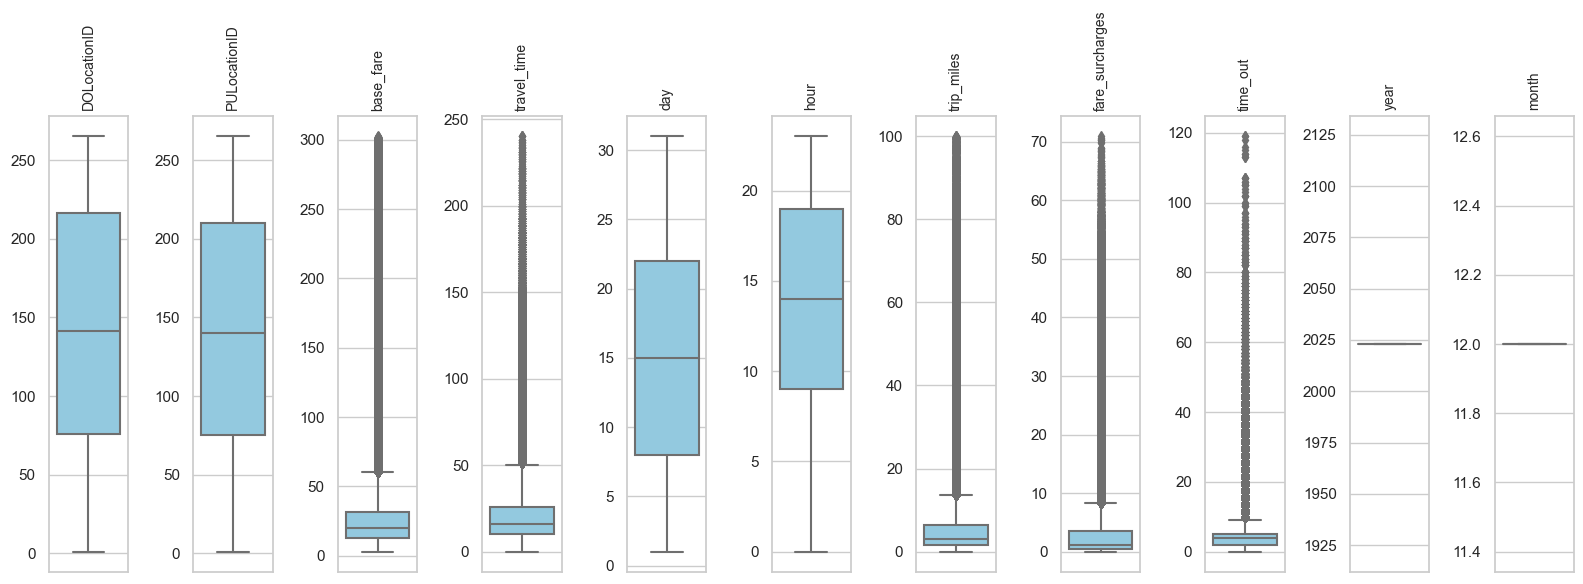

In [143]:
# Selecciona solo las columnas numéricas
df_numerical = UberLyft.select_dtypes(include='number')

# Calcula el IQR (rango intercuartílico) para cada columna y ordénalas por el IQR
iqr_values = (df_numerical.quantile(0.75) - df_numerical.quantile(0.25)).sort_values(ascending=False)
sorted_columns = iqr_values.index

# Ordena las columnas en df_numerical de acuerdo con el orden de iqr_values
df_numerical = df_numerical[sorted_columns]


# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Tamaño de la figura y espaciado entre subtramas
plt.figure(figsize=(16, 6))
plt.subplots_adjust(wspace=0.4)  # Ajusta el espaciado horizontal entre subtramas

# Crea el gráfico de caja utilizando Seaborn
for i, column in enumerate(sorted_columns):
    ax = plt.subplot(1, len(sorted_columns), i+1)  # Subtrama para cada variable
    sns.boxplot(y=df_numerical[column], color='skyblue', ax=ax)
    ax.set_title(column, rotation=90, fontsize=10)  # Rotar el título y ajustar tamaño de fuente
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x verticalmente

plt.tight_layout()
plt.show()

En este punto se debe definir si permitimos agregación de los datos de los Outliers o si los separamos del dataset para unirlos al final y mejorar los análisis.

### 16. Agregar columnas de $mile y $minute para revisar nuevos Outliers:

In [144]:
# Filtrar los registros donde trip_miles es cero y asignar un valor NaN
UberLyft['$mile'] = np.where(UberLyft['trip_miles'] != 0, UberLyft['base_fare'] / UberLyft['trip_miles'], np.nan)

# Filtrar los registros donde trip_minutes es cero y asignar un valor NaN
UberLyft['$minute'] = np.where(UberLyft['travel_time'] != 0, UberLyft['base_fare'] / UberLyft['travel_time'], np.nan)


Verificar nivel de eliminación de registros en porcentaje:

In [145]:
Total_Servicios_Sin_Outliers_extremos=len(UberLyft)
Total_Servicios_Sin_Outliers_extremos

print("Porcentaje de eliminación en este punto:",round((Total_Registros_inicial-Total_Servicios_Sin_Outliers_extremos)/
                                                       Total_Registros_inicial,4)*100)

Porcentaje de eliminación en este punto: 0.03


Observando que el nivel de elimnación de registros sustentados anteriromente en valores que salen de lo normal, debido a las distancia máxima en NYC y tarifas por milla. Ahora se busca determinar si una elimnación de registros basado en 3 sigma es significativo en el núemro de registros.

### 17. Eliminar los Outliers basado en los rangos intercuartílicos:

Se decide evitar el sesgo de costos que se mantienen muy lejos de la relación Tarifa por milla o Tarifa por minuto así que se eliminan los registros que estén por encima de este cálculo. No se usa 3 sigma debido a que el sesgo de datos atípicos es muy alto. Tmabién se decide eliminar registros que superoan los 250 dólares por no representar la realidad de un servicio normal dentro de la ciudad de NYC.

In [161]:
# Calcular los cuartiles
Q1_mile = UberLyft['$mile'].quantile(0.25)
Q3_mile = UberLyft['$mile'].quantile(0.75)
IQR_mile = Q3_mile - Q1_mile

Q1_minute = UberLyft['$minute'].quantile(0.25)
Q3_minute = UberLyft['$minute'].quantile(0.75)
IQR_minute = Q3_minute - Q1_minute

# Multiplicador para rango intercuartílico:
multiplicador = 2

# Definir los límites superior e inferior
umbral_inf_mile = Q1_mile - multiplicador * IQR_mile
umbral_sup_mile = Q3_mile + multiplicador * IQR_mile

umbral_inf_minute = Q1_minute - multiplicador * IQR_minute
umbral_sup_minute = Q3_minute + multiplicador * IQR_minute

# Filtrar los registros que caen dentro del rango intercuartílico para cada columna
UberLyft_filtrado = UberLyft[
    (UberLyft['$mile'] >= umbral_inf_mile) & (UberLyft['$mile'] <= umbral_sup_mile) &
    (UberLyft['$minute'] >= umbral_inf_minute) & (UberLyft['$minute'] <= umbral_sup_minute)
]

# Calcular el promedio para las columnas filtradas
promedio_cost_mile_filtrado = UberLyft_filtrado['$mile'].mean()
promedio_cost_minute_filtrado = UberLyft_filtrado['$minute'].mean()

# Imprimir los resultados
print("Promedio de $/milla sin datos atípicos:", promedio_cost_mile_filtrado)
print("Promedio de $/minuto sin datos atípicos:", promedio_cost_minute_filtrado)


Promedio de $/milla sin datos atípicos: 6.617292551560541
Promedio de $/minuto sin datos atípicos: 1.3318552915707191


In [162]:
# Número de servicios con $mile sobre el umbral:
Cost_mile_sobre_umbral = (UberLyft['$mile'] > umbral_sup_mile ).sum()

# Número de servicios con $time sobre el umbral:
Cost_minute_sobre_umbral = (UberLyft['$minute'] > umbral_sup_minute).sum()

print(f'el número de registros sobre el umbral de $/milla es: {Cost_mile_sobre_umbral}')
print(f'el número de registros sobre el umbral de $/minuto es: {Cost_minute_sobre_umbral}')

el número de registros sobre el umbral de $/milla es: 888575
el número de registros sobre el umbral de $/minuto es: 817826


Verificar nivel de eliminación de registros:

In [163]:
Total_servicios_Final=len(UberLyft_filtrado)

print("Porcentaje de eliminación en este punto:",round((Total_Registros_inicial-Total_servicios_Final)/
                                                       Total_Registros_inicial,4)*100)

Porcentaje de eliminación en este punto: 6.6000000000000005


### 18. Eliminar datos con ubicaciones no definidas:

Contar servicios con ubicación desconocida en origen o destino:

In [164]:
# Número de servicios con ubicación de recogida o llegada desconocido:
DO_location_264 = (UberLyft_filtrado['DOLocationID'] == 264).sum()
DO_location_265 = (UberLyft_filtrado['DOLocationID'] == 265).sum()
PU_location_264 = (UberLyft_filtrado['PULocationID'] == 264).sum()
PU_location_265 = (UberLyft_filtrado['PULocationID'] == 265).sum()

print('registros con ubicación DO 264 (NV): ',DO_location_264)
print('registros con ubicación DO 265 (NA): ',DO_location_265)
print('registros con ubicación PU 264 (NV): ',PU_location_264)
print('registros con ubicación PU 265 (NA): ',PU_location_265)

print('Total: ',PU_location_265+PU_location_264+DO_location_265+DO_location_264)

registros con ubicación DO 264 (NV):  0
registros con ubicación DO 265 (NA):  801568
registros con ubicación PU 264 (NV):  0
registros con ubicación PU 265 (NA):  828
Total:  802396


Elimnar registros:

In [165]:
# Eliminar los registros con DOLocationID igual a 264
UberLyft_filtrado = UberLyft_filtrado.loc[UberLyft_filtrado['DOLocationID'] != 264]

# Eliminar los registros con DOLocationID igual a 265
UberLyft_filtrado = UberLyft_filtrado.loc[UberLyft_filtrado['DOLocationID'] != 265]

# Eliminar los registros con PULocationID igual a 264
UberLyft_filtrado = UberLyft_filtrado.loc[UberLyft_filtrado['PULocationID'] != 264]

# Eliminar los registros con PULocationID igual a 265
UberLyft_filtrado = UberLyft_filtrado.loc[UberLyft_filtrado['PULocationID'] != 265]


Revisar nuevamente los Outliers:

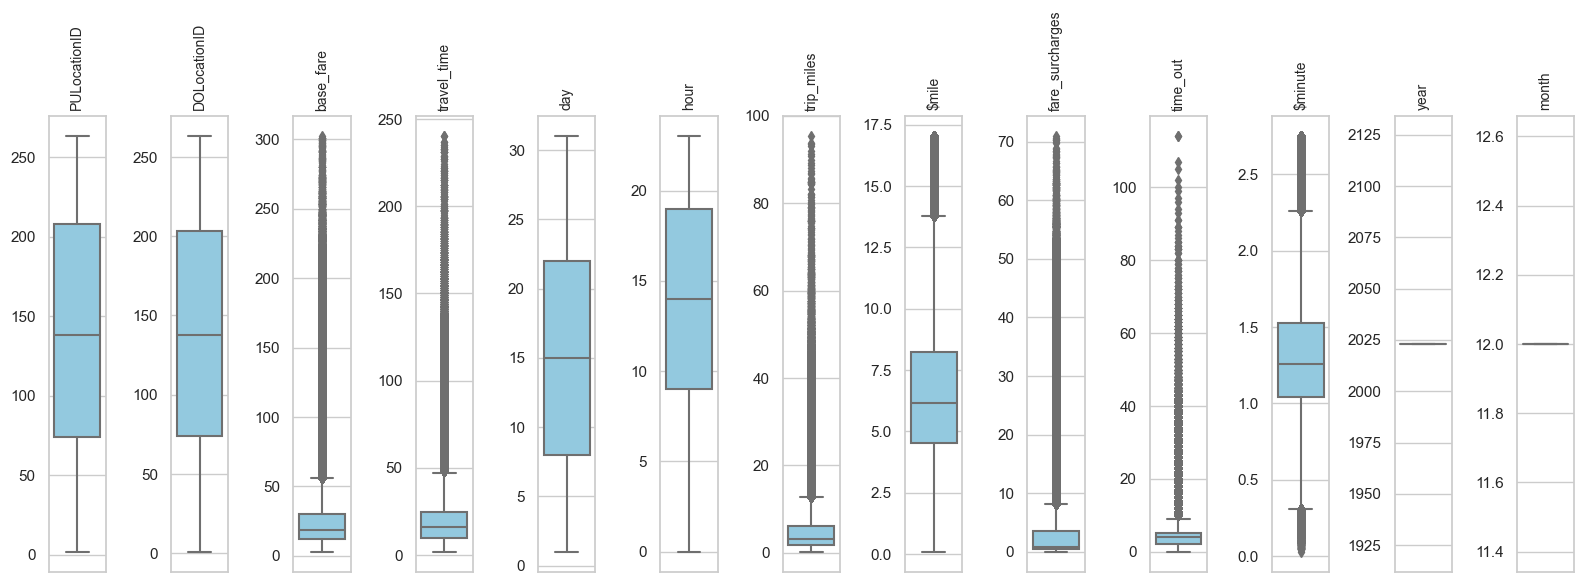

In [166]:
# Selecciona solo las columnas numéricas
df_numerical = UberLyft_filtrado.select_dtypes(include='number')

# Calcula el IQR (rango intercuartílico) para cada columna y ordénalas por el IQR
iqr_values = (df_numerical.quantile(0.75) - df_numerical.quantile(0.25)).sort_values(ascending=False)
sorted_columns = iqr_values.index

# Ordena las columnas en df_numerical de acuerdo con el orden de iqr_values
df_numerical = df_numerical[sorted_columns]


# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Tamaño de la figura y espaciado entre subtramas
plt.figure(figsize=(16, 6))
plt.subplots_adjust(wspace=0.4)  # Ajusta el espaciado horizontal entre subtramas

# Crea el gráfico de caja utilizando Seaborn
for i, column in enumerate(sorted_columns):
    ax = plt.subplot(1, len(sorted_columns), i+1)  # Subtrama para cada variable
    sns.boxplot(y=df_numerical[column], color='skyblue', ax=ax)
    ax.set_title(column, rotation=90, fontsize=10)  # Rotar el título y ajustar tamaño de fuente
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x verticalmente

plt.tight_layout()
plt.show()

Revisar nivel de eliminación:

In [167]:
Total_servicios_Final=len(UberLyft_filtrado)

print("Porcentaje de eliminación en este punto:",round((Total_Registros_inicial-Total_servicios_Final)/
                                                       Total_Registros_inicial,4)*100)

Porcentaje de eliminación en este punto: 10.51


### 19. Realizar agregaciones:

In [168]:
# Crear la columna "service_number" y asignar el valor 1 a todas las filas
UberLyft_filtrado['service_number'] = 1

# Definir las dimensiones de agrupación y las variables de agregación
dimensiones = ['year', 'month', 'day', 'hour', 'PULocationID', 'DOLocationID']
variables_agregacion = ['trip_miles', 'time_out', 'travel_time', 'fare_surcharges', 'base_fare', 'service_number']

# Agrupar el DataFrame y calcular la suma de las variables de agregación
UberLyft_agrupado = UberLyft_filtrado.groupby(dimensiones)[variables_agregacion].sum().reset_index()

Ordenar columnas:

In [169]:
# Reordenar las columnas para que primero estén las dimensiones y luego las variables de agregación
columnas_ordenadas = dimensiones + variables_agregacion

# Reordenar el DataFrame agrupado
UberLyft_agrupado = UberLyft_agrupado[columnas_ordenadas]

In [170]:
UberLyft_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6925873 entries, 0 to 6925872
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   year             int32  
 1   month            int32  
 2   day              int32  
 3   hour             int64  
 4   PULocationID     int32  
 5   DOLocationID     int32  
 6   trip_miles       float64
 7   time_out         int32  
 8   travel_time      int32  
 9   fare_surcharges  float64
 10  base_fare        float64
 11  service_number   int64  
dtypes: float64(3), int32(7), int64(2)
memory usage: 449.1 MB


Las agrupaciones disminuyen significatitivamente el número de registros y el tamaño del archivo:

### 20. Exportar archivo a Parquet:

In [171]:
UberLyft_agrupado.to_parquet('../DataClean/UberLyft_Agrupado.parquet')

### 21. EDA sobre datos agrupados:

Rutas mas frecuentes:

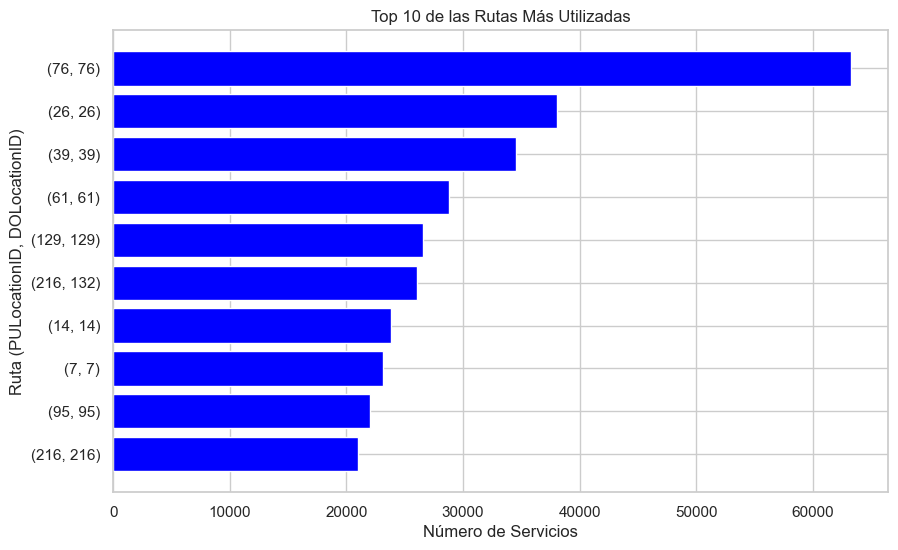

In [172]:
# Calcular la suma de service_number agrupada por PULocationID y DOLocationID
rutas_mas_utilizadas = UberLyft_agrupado.groupby(['PULocationID', 'DOLocationID'])['service_number'].sum()

# Ordenar en orden descendente y obtener el top 10
top_10_rutas_mas_utilizadas = rutas_mas_utilizadas.sort_values(ascending=False).head(10)

# Obtener las 10 rutas más utilizadas
top_10_rutas = top_10_rutas_mas_utilizadas.reset_index()

# Crear una figura y ejes
plt.figure(figsize=(10, 6))
plt.barh(range(10), top_10_rutas['service_number'], color='blue')
plt.xlabel('Número de Servicios')
plt.ylabel('Ruta (PULocationID, DOLocationID)')
plt.title('Top 10 de las Rutas Más Utilizadas')
plt.yticks(range(10), [f"({row['PULocationID']}, {row['DOLocationID']})" for _, row in top_10_rutas.iterrows()])
plt.gca().invert_yaxis()  # Invertir el eje y para que la ruta más utilizada esté en la parte superior
plt.show()


Horas pico por día:

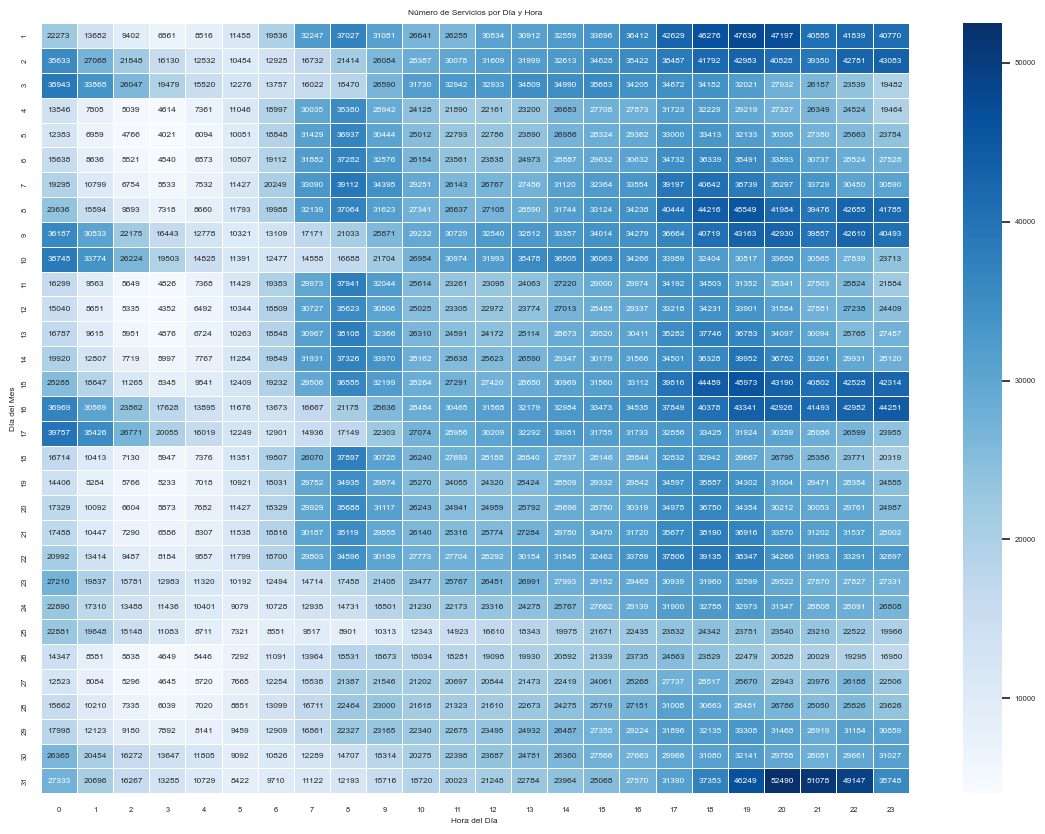

In [173]:
# Ajustar el tamaño de la figura y la fuente
plt.figure(figsize=(14, 10))
sns.set(font_scale=0.5)

# Crear una tabla pivote para el número de servicios por día y hora
tabla_pivote = UberLyft_agrupado.pivot_table(index='day', columns='hour', values='service_number', aggfunc='sum')

# Crear la matriz de calor
sns.heatmap(tabla_pivote, cmap='Blues', annot=True, fmt='d', linewidths=.5, linecolor='white')
plt.title('Número de Servicios por Día y Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Día del Mes')
plt.show()



Lugares donde el usuario espera con mayor tiem por un servicio:

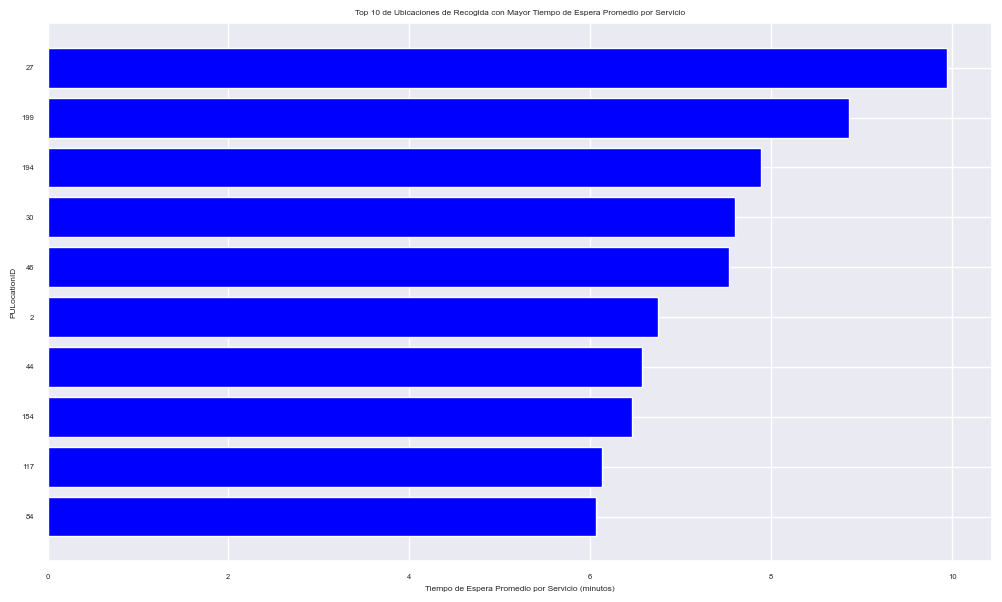

In [174]:
# Calcular el tiempo de espera promedio por servicio
UberLyft_agrupado['tiempo_espera_promedio_por_servicio'] = UberLyft_agrupado['time_out'] / UberLyft_agrupado['service_number']

# Calcular el tiempo de espera promedio por PULocationID
tiempo_espera_promedio_por_locacion = UberLyft_agrupado.groupby('PULocationID')['tiempo_espera_promedio_por_servicio'].mean()

# Seleccionar las 10 principales ubicaciones de recogida
top_10_locaciones = tiempo_espera_promedio_por_locacion.nlargest(10)

# Obtener los datos para graficar, ordenados de mayor a menor
locaciones = top_10_locaciones.sort_values(ascending=False).index.astype(str)  # Convertir a cadena
tiempo_espera_promedio = top_10_locaciones.sort_values(ascending=False).values

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.barh(locaciones, tiempo_espera_promedio, color='blue')
plt.xlabel('Tiempo de Espera Promedio por Servicio (minutos)')
plt.ylabel('PULocationID')
plt.title('Top 10 de Ubicaciones de Recogida con Mayor Tiempo de Espera Promedio por Servicio')
plt.gca().invert_yaxis()  # Invertir el eje y para que las ubicaciones se muestren en orden descendente
plt.tight_layout()  # Ajustar el diseño de la gráfica
plt.show()


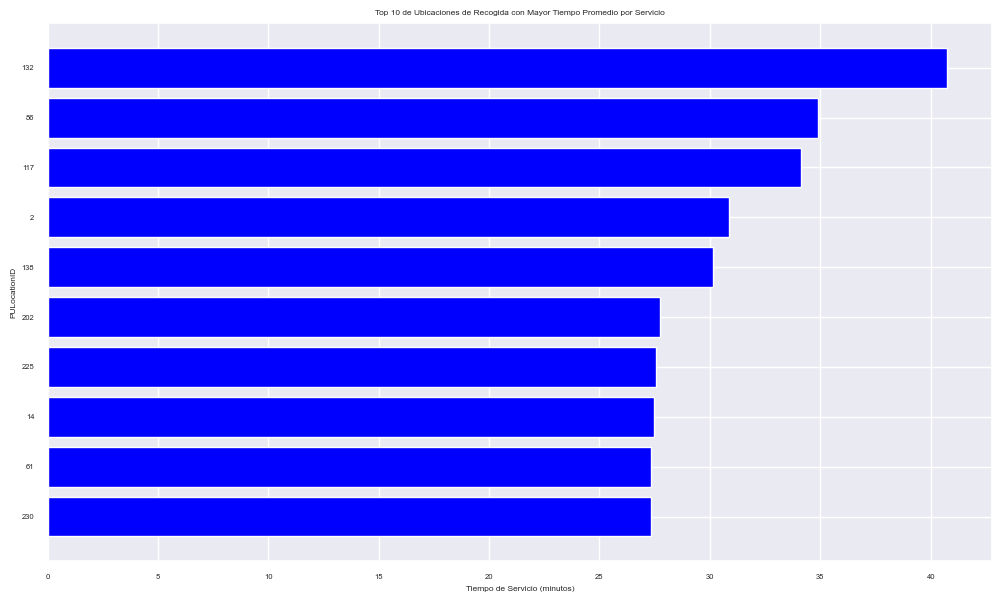

In [175]:
# Calcular el tiempo de espera promedio por servicio
UberLyft_agrupado['tiempo_espera_promedio_por_servicio'] = UberLyft_agrupado['travel_time'] / UberLyft_agrupado['service_number']

# Calcular el tiempo de espera promedio por PULocationID
tiempo_espera_promedio_por_locacion = UberLyft_agrupado.groupby('PULocationID')['tiempo_espera_promedio_por_servicio'].mean()

# Seleccionar las 10 principales ubicaciones de recogida
top_10_locaciones = tiempo_espera_promedio_por_locacion.nlargest(10)

# Obtener los datos para graficar, ordenados de mayor a menor
locaciones = top_10_locaciones.sort_values(ascending=False).index.astype(str)  # Convertir a cadena
tiempo_espera_promedio = top_10_locaciones.sort_values(ascending=False).values

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.barh(locaciones, tiempo_espera_promedio, color='blue')
plt.xlabel('Tiempo de Servicio (minutos)')
plt.ylabel('PULocationID')
plt.title('Top 10 de Ubicaciones de Recogida con Mayor Tiempo Promedio por Servicio')
plt.gca().invert_yaxis()  # Invertir el eje y para que las ubicaciones se muestren en orden descendente
plt.tight_layout()  # Ajustar el diseño de la gráfica
plt.show()